Will there be a tornado today? Classification with Scikit-Learn
===

Alyssa Batula
---

IndyPy 8/14/2018
---

The Problem
===

* Dataset: [NOAA Weather Data](https://www.kaggle.com/noaa/gsod) from Kaggle 
    - Daily weather recordings from ~9,000 weather stations
    - Temperature, precipitation, fog, etc.
* Goal: predict if tornado will form based on other weather data
    - Classification: yes or no
* Compare 4 classifiers

Assumptions
===

* Dataset has been cleaned/scrubbed
    - No missing data
    - All features numeric
* Un-needed features removed

In [1]:
# Imports
from IPython.display import display

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

The Data
===

In [2]:
data = pd.read_csv('data/NOAA.csv')

data[['temp', 'fog', 'rain_drizzle', 'prcp', 'hail', 'thunder', 'tornado_funnel_cloud']].describe()

,temp,fog,rain_drizzle,prcp,hail,thunder,tornado_funnel_cloud
count,4700.000000,4700.000000,4700.000000,4700.000000,4700.000000,4700.000000,4700.000000
mean,58.785043,0.076809,0.372766,0.122770,0.005532,0.146596,0.255319
std,24.130119,0.266316,0.483592,0.399898,0.074179,0.353740,0.436087
min,-50.900000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,44.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,64.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,79.100000,0.000000,1.000000,0.040000,0.000000,0.000000,1.000000
max,101.900000,1.000000,1.000000,11.810000,1.000000,1.000000,1.000000


Determine Target Variable and Features
---

* Classification: Tornado (1) or No Tornado (0)
* Target value in `y`
* Features in `X`

In [3]:
y = data['tornado_funnel_cloud']
X = data.drop('tornado_funnel_cloud', axis=1)

Training, Testing, and Validation
===

![Train/Test/Validation Split](img/TrainTestValSplit.png)

- **Training Set** - Portion of the data used to train a machine learning algorithm.
- **Validation Set** - (Optional) Portion of data (usually 10-30%) used for testing during parameter tuning or classifier selection.
- **Testing Set** - Portion of the data (usually 10-30%) not used in training, used to evaluate performance.

Training, Testing, and Validation
===

* **Training Set** - Homework
    - Many exercises, start knowing nothing
    - Use the answers to learn

* **Validation Set** - Practice Exam
    - Few exercises, use knowledge learned from training set/homework
    - Use answers to decide if you're ready for the test

* **Test Set** - Final Exam
    - Few exercises, use knowledge learned from training and validation
    - Use answers to give your algorithm a final grade

Create a Test Set
===

In [4]:
from sklearn.model_selection import train_test_split

X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, 
                                                          test_size=0.25, # Percentage of data for test set
                                                          stratify=y, # Keep label distribution when splitting
                                                          random_state=42 # Set the random seed for repeatability
                                                         )

print(f'Original dataset size: {X.shape}')
print(f'Training & Validation dataset size: {X_trainval.shape}')
print(f'Test dataset size: {X_test.shape}')

Original dataset size: (4700, 28)
Training & Validation dataset size: (3525, 28)
Test dataset size: (1175, 28)


Create Validation and Training Sets
---

In [7]:
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, 
                                                          test_size=0.33, # Percentage of data for validation set
                                                          stratify=y_trainval, # Keep label distribution when splitting
                                                          random_state=42 # Set the random seed for repeatability
                                                         )

print(f'Original dataset size: {X.shape}')
print(f'Training dataset size: {X_train.shape}')
print(f'Validation dataset size: {X_val.shape}')
print(f'Test dataset size: {X_test.shape}')

Original dataset size: (4700, 28)
Training dataset size: (2361, 28)
Validation dataset size: (1164, 28)
Test dataset size: (1175, 28)


Classifiers
===

* K Nearest Neighbors (KNN)
* Support Vector Machine (SVM)

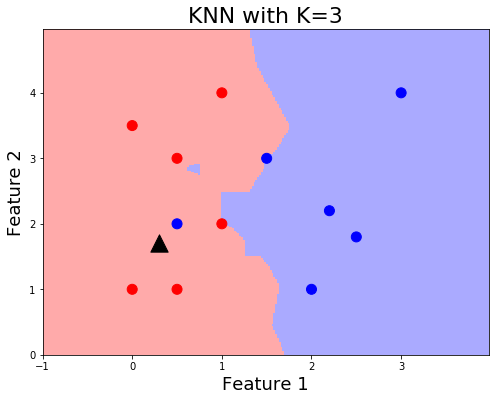

In [31]:
from sklearn import neighbors
from matplotlib.colors import ListedColormap

X = np.array([[0,1], [1,2], [0,3.5], [0.5,1], [1,4], [0.5, 3], [2,1], [3,4], [0.5, 2], [1.5, 3], [2.2, 2.2], [2.5, 1.8]])
y = [0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1 ,1]

clf = neighbors.KNeighborsClassifier(3)
clf.fit(X,y)

h = .02  # step size in the mesh

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]) # Make a prediction oat every point 
                                               # in the mesh in order to find the 
                                               # classification areas for each label
        
# Create the color maps
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(figsize=(8, 6))
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, s=100)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("KNN with K=3", fontsize=22)
plt.xlabel('Feature 1', fontsize=18)
plt.ylabel('Feature 2', fontsize=18)

plt.scatter(0.3, 1.7, c='k', marker='^', s=300)
plt.savefig('img/knn_example.png', dpi=500)
plt.show()

K Nearest Neighbors (KNN)
---

* Assigns label based on nearest labeled datapoints

![KNN Example](img/knn_example.png)

KNN Notes
---

* Label chosen based on vote of nearest labeled examples
* In plot above: red and blue circles are two classes, black triangle is unknown point
* Triangle will be labeled red, since we chose K=3 and 2/3 closest points are red

The classifier (KNN)
---

In [7]:
from sklearn import neighbors
from sklearn.metrics import accuracy_score

n_neighbors = 15
clf = neighbors.KNeighborsClassifier(n_neighbors)
clf.fit(X_train, y_train)

predictions = clf.predict(X_val)
acc = accuracy_score(y_val, predictions) * 100

print(f'Accuracy is {acc:.2f}%')

Accuracy is 73.66%


Combine the classifier and crossvalidation
---

In [8]:
n_neighbors = 15
clf = neighbors.KNeighborsClassifier(n_neighbors)

foldAcc = []

kf = StratifiedKFold(n_splits=10, random_state=42)
for trainInd, valInd in kf.split(X_trainval, y_trainval):
    X_train = X_trainval.iloc[trainInd,:]
    y_train = y_trainval.iloc[trainInd]
    X_val = X_trainval.iloc[valInd,:]
    y_val = y_trainval.iloc[valInd]
    
    clf.fit(X_train, y_train)
    predictions = clf.predict(X_val)
    acc = accuracy_score(y_val, predictions) * 100
    foldAcc.append(acc)
    
print(f'Average Accuracy: {np.mean(foldAcc):.2f}%')
print(f'Standard Deviation of Accuracy: {np.std(foldAcc):.2f}')

Average Accuracy: 77.01%
Standard Deviation of Accuracy: 2.20


SVM
---

* Very quick intro

In [9]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

clf = SVC(C=1.0, kernel='rbf')
clf.fit(X_train, y_train)

predictions = clf.predict(X_val)
acc = accuracy_score(y_val, predictions) * 100

print(f'Accuracy is {acc:.2f}%')

Accuracy is 61.61%


In [10]:
clf = SVC(C=1.0, kernel='rbf')

foldAcc = []

kf = StratifiedKFold(n_splits=10, random_state=42)
for trainInd, valInd in kf.split(X_trainval, y_trainval):
    X_train = X_trainval.iloc[trainInd,:]
    y_train = y_trainval.iloc[trainInd]
    X_val = X_trainval.iloc[valInd,:]
    y_val = y_trainval.iloc[valInd]
    
    clf.fit(X_train, y_train)
    predictions = clf.predict(X_val)
    acc = accuracy_score(y_val, predictions) * 100
    foldAcc.append(acc)
    
print(f'Average Accuracy: {np.mean(foldAcc):.2f}%')
print(f'Standard Deviation of Accuracy: {np.std(foldAcc):.2f}')

Average Accuracy: 59.69%
Standard Deviation of Accuracy: 2.25


Choose the Best Classifier
---

In [11]:
clf_svm1 = SVC(C=1.0, kernel='rbf')
clf_svm2 = SVC(C=0.1, kernel='sigmoid')
clf_knn1 = neighbors.KNeighborsClassifier(5)
clf_knn2 = neighbors.KNeighborsClassifier(10)

foldAcc_svm1 = []
foldAcc_svm2 = []
foldAcc_knn1 = []
foldAcc_knn2 = []

kf = StratifiedKFold(n_splits=10, random_state=42)

In [12]:
for trainInd, valInd in kf.split(X_trainval, y_trainval):
    X_train = X_trainval.iloc[trainInd,:]
    y_train = y_trainval.iloc[trainInd]
    X_val = X_trainval.iloc[valInd,:]
    y_val = y_trainval.iloc[valInd]
    
    clf_svm1.fit(X_train, y_train)
    clf_svm2.fit(X_train, y_train)
    clf_knn1.fit(X_train, y_train)
    clf_knn2.fit(X_train, y_train)
    
    pred_svm1 = clf_svm1.predict(X_val)
    pred_svm2 = clf_svm2.predict(X_val)
    pred_knn1 = clf_knn1.predict(X_val)
    pred_knn2 = clf_knn2.predict(X_val)
    
    foldAcc_svm1.append(accuracy_score(y_val, pred_svm1) * 100)
    foldAcc_svm2.append(accuracy_score(y_val, pred_svm2) * 100)
    foldAcc_knn1.append(accuracy_score(y_val, pred_knn1) * 100)
    foldAcc_knn2.append(accuracy_score(y_val, pred_knn2) * 100)

In [13]:
print(f'SVM1 Accuracy: {np.mean(foldAcc_svm1):.2f}%')
print(f'SVM2 Accuracy: {np.mean(foldAcc_svm2):.2f}%')
print(f'KNN1 Accuracy: {np.mean(foldAcc_knn1):.2f}%')
print(f'KNN2 Accuracy: {np.mean(foldAcc_knn2):.2f}%')

SVM1 Accuracy: 59.69%
SVM2 Accuracy: 50.00%
KNN1 Accuracy: 77.68%
KNN2 Accuracy: 77.54%


Evaluate the Winner
---

* Check final version and make sure we pick the real winner

In [16]:
predictions = clf_knn1.predict(X_test)
acc = accuracy_score(y_test, predictions)
print(f'Final Accuracy: {acc*100:.2f}%')

Final Accuracy: 75.52%
